In [412]:
# Initialize Otter
import otter
grader = otter.Notebook("HW4_FK-IK.ipynb")

In [413]:
import numpy as np
from numpy import cos, sin, pi

# FILL IN YOUR NAME AND THE NAME OF YOUR PEER (IF ANY) BELOW

**Name**: Maede Boroji

**Peer**: Vahid Danesh

## Collaboration policy
Students are responsible for writing their own quizzes, assignments, and exams. For homework assignments, students are welcome (and encouraged) to discuss problems with one peer, **but each student must write their own assignment wrtieup and code individually**. The peer must be listed at the top of the writeup for each assignment. *Note: I will treat AI assistants as peers. That is, students are welcome to discuss problems with an AI assistant, but it is considered cheating to directly obtain an answer by querying the assistant. Please credit any AI assistant that you use.*

# Homework 4 -- Forward and inverse kinematics (100 pts)

**Due:** Tuesday, February 25th, 2025 at 11:59 pm

This homework builds on the material in the slides, Hauser Chapters 5 and 6 (on Forward Kinematics and Inverse Kinematics), and Tedrake chapter 3 (on Basic Pick-and-Place, especially 3.1 and 3.3).

We will use Jupyter/Colab notebooks throughout the semester for writing code and generating assignment outputs.

**Throughout this homework, please use 2D numpy arrays to represent all matrices. The autograder will use a precision of 3 decimal places.**


## 1) Calculating Forward Kinematics (20 pts)
For the following questions, you will derive a matrix expression for the pose of a coordinate frame attached to a robot's end-point (typically referred to as the "end-effector"), in terms of the variable joint configuration of the robot. In each case, it may be helpful to define intermediate frames such that defining each intermediate transformation matrix is easy. Your answers will by Python functions that receive as input the configuration of the joints and output the pose of the robot. **Unless otherwise stated, your functions may not call any external matrix multiplication function (e.g., `np.dot`).**

#### 1.1) Combined revolute and prismatic joint in 2D

Consider a 2D robot with a single special revolute+prismatic joint, as depicted below:

<img src="https://jorge-a-mendez.github.io/images/ese564s24/2d_simple_fk.png" width=30%>

(Note that this is just two joints attached at the same points.) The base link is aligned with the world frame, and the child link is attached to the special joint. The joint is displaced by a distance $d$ from the origin of the world frame in the $x$ direction, and rotated by $\theta$ above the world's $x$ axis. The child link has a length of $l$, and the end-effector coordinate frame is attached at the end-point of the link, with the $x$ axis facing away from the link. 

Write a Python function that returns the pose of the end-effector frame in world coordinates as a function of $l$, $d$, and $\theta$. 

_Points:_ 5

In [414]:
# Your function should return a (2,2) numpy array for the rotation matrix and a (2,) numpy array for the position vector
def X_G_11(l, d, theta):
    R = np.array([[cos(theta), -sin(theta)],
                  [sin(theta), cos(theta)] 
                  ])
    P = np.array([l*cos(theta) + d,
                  l*sin(theta)])
    
    return R,P

#### 1.2) Translate and rotate in 3D

Consider the 3D mechanism depicted below:

<img src="https://jorge-a-mendez.github.io/images/ese564s24/3d_simple_fk.png" width=30%>

The base link is attached to the world frame and connected to a revolute joint by a link of length $l_1$ in the $x$ direction. The revolute joint rotates about the $z$ axis by an angle $\theta$, and is connected to the end effector by a link of length $l_2$ in the $x$ direction when $\theta=0$. The end-effector frame is aligned with the world's when $\theta=0$. The overall mechanism adds a height of $l_0$ in the world $z$ axis. 

Write a Python function that returns the pose of the end-effector frame in world coordinates as a function of $l_1$, $l_2$, $l_0$, and $\theta$.  

_Points:_ 5

In [415]:
# Your function should return a (3,3) numpy array for the rotation matrix and a (3,) numpy array for the position vector
def X_G_12(l0, l1, l2, theta):
    R = np.array([[cos(theta), -sin(theta), 0],
                  [sin(theta), cos(theta), 0],
                  [0, 0, 1]])
    P = np.array([l1+l2*cos(theta),
                  l2*sin(theta),
                  l0])
    return R, P

#### 1.3) Multi-joint 2D mechanism

Consider a 2D robot with two prismatic and two revolute joints, as shown below:

<img src="https://jorge-a-mendez.github.io/images/ese564s24/2d_complex_fk.png" width=20%>

The base link is aligned with the world frame. The first child link is translated by $d_1$ along the world's $x$ axis and has a height of $l_0$. The second child link rotates by $\theta_1$ above the world $x$ axis. The third child link is translated along the second link's length by $d_2$ and has a height $l_1$. The fourth child link rotates above the axis defined by the second child link and has length $l_2$. The end-effector frame is at the end of the fourth child link and its $x$ axis points away from the link. 

Write a Python function that returns the pose of the end-effector frame in world coordinates as a function of $l_0$, $l_1$, $l_2$, $d_1$, $d_2$, $\theta_1$, $\theta_2$.

_Points:_ 5

In [416]:
# Your function should return a (2,2) numpy array for the rotation matrix and a (2,) numpy array for the position vector
def X_G_13(l0, l1, l2, d1, d2, theta1, theta2):
    R = np.array([[cos(theta1)*cos(theta2)-sin(theta1)*sin(theta2), -cos(theta1)*sin(theta2)-sin(theta1)*cos(theta2)],
                  [sin(theta1)*cos(theta2)+cos(theta1)*sin(theta2), -sin(theta1)*sin(theta2)+cos(theta1)*cos(theta2)]])
    P = np.array([l2*cos(theta2)*cos(theta1)-l2*sin(theta2)*sin(theta1)+d2*cos(theta1)-l1*sin(theta1)+d1,
                  l2*cos(theta2)*sin(theta1)+l2*sin(theta2)*cos(theta1)+d2*sin(theta1)+l1*cos(theta1)+l0])
    return R, P

#### 1.4) Industrial robot

Consider the 3D mechanism depicted below, which is a somewhat typical industrial robot arm:

<img src="https://jorge-a-mendez.github.io/images/ese564s24/3d_complex_fk.png" width=30%>

The robot has six revolute joints, so it is a 6DoF arm. One interesting property of 6DoF arms is that they can achieve any 6D pose that is within reach---they are fully actuated. Write a Python function that calculates the pose of the end-effector, defined as the position of the point between the parallel fingers (i.e., at distance $L_6$ from joint 6) and the orientation of the frame at joint 6 as depicted in the figure. The world frame coincides with the depicted joint 1 frame when $q_0=0$. (Other frames depicted in the figure may be useful intermediate frames for your calculations).

Write a Python function that computes the end-effector pose in world coordinates as a function of the joint angles $q_{1\ldots6}$ and the link lengths $L_1$, $L_2$, $L_3$, and $L_6$. **Please don't do all calculations by hand. Instead, write the intermediate transforms in your code and use numpy's matrix multiplication functions (e.g., `np.dot`) to compute the overall transform.**

_Points:_ 5

In [417]:
# Your function should return a (3,3) numpy array for the rotation matrix and a (3,) numpy array for the position vector
def X_G_14(l1, l2, l3, l6, q1, q2, q3, q4, q5, q6):
    T_0_1 = np.array([[cos(q1), -sin(q1), 0, 0],
                      [sin(q1), cos(q1), 0, 0],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]])
    T_1_2 = np.array([[cos(q2), 0, sin(q2), 0],
                      [0, 1, 0, 0],
                      [-sin(q2), 0, cos(q2), l1],
                      [0, 0, 0, 1]])
    T_2_3 = np.array([[cos(q3), 0, sin(q3), l2],
                      [0, 1, 0, 0],
                      [-sin(q3), 0, cos(q3), 0],
                      [0, 0, 0, 1]])
    T_3_4 = np.array([[1, 0, 0, 0],
                      [0, cos(q4), -sin(q4), 0],
                      [0, sin(q4), cos(q4), 0],
                      [0, 0, 0, 1]])
    T_4_5 = np.array([[cos(q5), 0 , sin(q5), l3],
                      [0, 1, 0, 0],
                      [-sin(q5), 0, cos(q5), 0],
                      [0, 0, 0, 1]])
    T_5_6 = np.array([[1, 0, 0, 0],
                      [0, cos(q6), -sin(q6), 0],
                      [0, sin(q6), cos(q6), 0],
                      [0, 0, 0, 1]])
    T_6_7 = np.array([[1, 0, 0, l6],
                      [0, 1, 0, 0],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]])
    T_final = T_0_1 @ T_1_2 @ T_2_3 @ T_3_4 @ T_4_5 @ T_5_6 @ T_6_7
    R = T_final[:3, :3]
    P = T_final[:3, 3]
    return R, P

In [418]:
X_G_14(1, 2, 3, 6, 0, 0, 0, 0, 0, 0)

(array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([11.,  0.,  1.]))

## 2) Inverse kinematics in 2D (30)

We're going to explore the nuances of analytical solutions to inverse kinematics by looking at the following problem.

<img src="https://jorge-a-mendez.github.io/images/ese564s24/2RP_ik.png" width=30%>

The robot depicted above has two revolute joints and one prismatic joint. The first revolute joint connects the world frame to link 1, which has length $L_1$. At the end of link 1, there is another revolute joint connecting to link 2. The end point is a distance $d\geq 0$ away from the second revolute joint, where $d$ is determined by the prismatic joint. 

We will solve the forward and inverse kinematics for this robot.

#### 2.1) Forward kinematics

Find an expression for the forward kinematics of this robot. In other words, find the position and orientation for the tip of link 2 in the world frame located at joint 0 and pointing to the right. Assume that the coordinate frame at the tip is such that the $x$ axis points away from the tip. You are welcome to use any matrix multiplication function, but it may be useful to work out the expression by hand for the next question. Express your answer as a function of $L_1$, $d$, $\theta_1$, and $\theta_2$.

_Points:_ 5

In [419]:
# Your function should return a (2,2) numpy array for the rotation matrix and a (2,) numpy array for the position vector
def X_G_21(l1, theta1, theta2, d):
    R = np.array([[cos(theta1+theta2), -sin(theta1+theta2)],
                  [sin(theta1+theta2), cos(theta1+theta2)]])
    P = np.array([l1*cos(theta1)+d*cos(theta1+theta2),
                  l1*sin(theta1)+d*sin(theta1+theta2)])
    return R, P

$2\times2$ rotation matrices can be parameterized by a single number: the counter-clockwise angle of rotation. What is the angle of rotation for the orientation of the tip of link 2? Express your answer as a function of $L_1$, $d$, $\theta_1$, and $\theta_2$. Your answer should be an angle in $[0, 2\pi]$.

*Hint1: The angle-sum identities may come in handy: $$\begin{aligned}
    \sin(\alpha+\beta) &= \sin\alpha\cos\beta + \cos\alpha\sin\beta\\
    \cos(\alpha+\beta) &= \cos\alpha\cos\beta - \sin\alpha\sin\beta
\end{aligned}$$*
*Hint2: you may find the function `np.mod` useful.*

_Points:_ 2

In [420]:
# Your function should return a (2,2) numpy array for the rotation matrix and a (2,) numpy array for the position vector
def theta_G_211(l1, theta1, theta2, d):
    
    theta_G = theta1+theta2
    # Ensure the angle is in the range [0, 2π)
    theta_G = np.mod(theta_G, 2 * np.pi)
    return theta_G

#### 2.2) Inverse kinematics

We will now find an expression for the inverse kinematics of this mechanism. Given a target $x, y, \theta$ pose, our goal is to find the joint coordinates $\theta_1, \theta_2, d$ for the robot. 

Start by deriving an expression for all possible solutions to the IK problem with $\theta_1,\theta_2\in[0, 2\pi)$. For now, ignore the constraint $d\geq0$. 

*Hint: Plug your expression from 2.1.1 for $\theta$ into your expressions for $x$ and $y$ to obtain a system of 2 trigonometric equations. Manipulate the equations until you find one equation that involves a term of the form $\cos A\sin B - \sin A\cos B$, and use the identity $\cos A\sin B - \sin A\cos B = \sin(B-A)$.*

##### 2.2.1) 

As we saw in class, there are often IK problems (in this case, choices of target $x,y,\theta$) that cannot be solved for a given system. Inspect your expression for the IK and write a Python function that determines whether a given IK problem for this robot has a solution, ignoring the constraint $d\geq 0$.

*Hint: this can be written as a simple one-line check.*

_Points:_ 5

In [421]:
# Your function should return True if there is a valid solution to the IK problem, and False otherwise
# Note: this function should not return the solution to the IK, only whether a solution exists
def has_IK_221(l1, x, y, theta):
    check = (x * np.sin(theta) - y * np.cos(theta)) / l1

    # Check if the right-hand side is within the valid range [-1, 1]
    return -1 <= check <= 1

##### 2.2.2) 

We also saw that IK problems often have infinitely many solutions. Are there problems for which this system has infinitely many solutions?


_Points:_ 3

In [422]:
# set ans_222 to True if there are problems with infinitely many solutions for this system, and False otherwise
ans_222 = False

##### 2.2.3) 

Based on your answers so far, how many solutions can IK problems for this system have? Return a list with all possible numbers of solutions (e.g., `[10, 15, 167]` if the problem can have 10, 15, or 167 solutions)

_Points:_ 3

In [423]:
# Express your answer as a list of all possible numbers of solutions the system could have
ans_223 = [0, 1, 2]

##### 2.2.4) 

Write a Python function that implements the IK for this planar robot mechanism. The return value should be a `list` of solutions, where each solution is a tuple `(theta1, theta2, d)` (in that order). If there are no solutions, the list should be empty. The list should not contain repeated solutions (i.e., if you compute two solutions and they turn out to be equivalent, then you should return only one). To check whether two numbers are equivalent, use `np.isclose(a, b)` instead of `a == b`, to account for numerical errors.

You should leverage your function `has_IK_221` to avoid computing invalid solutions. Additionally, you should "filter out" (i.e., not return) any solutions where $d < 0$. Make sure that both `theta1` and `theta2` are in $[0, 2\pi)$. 

_Points:_ 10

In [424]:
# Your function should return a list of all possible IK solutions, without repetitions
def IK_224(l1, x, y, theta):

    # Check if a solution exists
    if not has_IK_221(l1, x, y, theta):
        return []
    else:
        frac = (x * sin(theta) - y * cos(theta)) / l1 # this is equal to sin(theta2)
        theta2_1 = np.arcsin(frac)
        theta2_1 = np.mod(theta2_1, 2*pi)  # Wrap to [0, 2pi)
        theta2_2 = -theta2_1 + pi
        theta2_2 = np.mod(theta2_2, 2*pi)  # Wrap to [0, 2pi)
        
        theta1_1 = theta - theta2_1
        theta1_1 = np.mod(theta1_1, 2*pi)  # Wrap to [0, 2pi)
        theta1_2 = theta - theta2_2
        theta1_2 = np.mod(theta1_2, 2*pi)  # Wrap to [0, 2pi)
        
        if theta != 0 and theta != np.pi:
            d1 = (y - l1 * sin(theta1_1)) / sin(theta)
            d2 = (y - l1 * sin(theta1_2)) / sin(theta)
        else:
            d1 = (x - l1 * cos(theta1_1)) / cos(theta)
            d2 = (x - l1 * cos(theta1_2)) / cos(theta)
                    
        solutions = []
        if d1 >= 0:
            solutions.append((theta1_1, theta2_1, d1))
        if d2 >= 0 and not np.isclose(theta1_1, theta1_2) and not np.isclose(theta2_1, theta2_2) and not np.isclose(d1, d2):  # Avoid duplicates
            solutions.append((theta1_2, theta2_2, d2))

    return solutions

##### 2.2.5) 

Give an example of an IK problem for this mechanism that has only one solution using $L_1=1$.

_Points:_ 2

In [425]:
# Express your answer as a tuple (x, y, theta)
#xyth_225 = IK_224(1, -1, 1, pi)
xyth_225 = (-1, 1, pi)

## 3) IK in practice (50 pts)

We are now going to use IK as you would in practice. Our goal will be to repeat the pick-place steps from HW 3, but this time setting the joint positions of the robot instead of a floating gripper. For that, we will use the popular `ikfast` tool, developed by MoveIt. `ikfast` finds analytical solutions to 6D-pose IK problems for arbitrary 6-DoF arms. While working directly with `ikfast` to create IK solutions for a custom robot is non-trivial and requires a bit of black magic, there are a number of Python bindings available for common robots---including our Franka Panda robot.

To install the Python bindings for running `ikfast` for the Panda, and initialize our MuJoCo model, run the following code cell.


Traceback (most recent call last):
  File "C:\Users\boroj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\setuptools\_distutils\file_util.py", line 34, in _copy_file_contents
    os.unlink(dst)
PermissionError: [WinError 5] Access is denied: 'g:\\My Drive\\Spring 2025 Semester\\ESE564 AI in Robotics\\HWs\\AI_Robotics\\HW4\\ikfast\\ikfast_panda_arm.cp312-win_amd64.pyd'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "g:\My Drive\Spring 2025 Semester\ESE564 AI in Robotics\HWs\AI_Robotics\HW4\ikfast\setup.py", line 18, in <module>
    main()
  File "g:\My Drive\Spring 2025 Semester\ESE564 AI in Robotics\HWs\AI_Robotics\HW4\ikfast\setup.py", line 13, in main
    compile_ikfast(module_name='ikfast_{}'.format(robot_name),
  File "g:\My Drive\Spring 2025 Semester\ESE564 AI in Robotics\HWs\AI_Robotics\HW4\ikfast\compile.py", line 36, in compile_ikfast
    

""

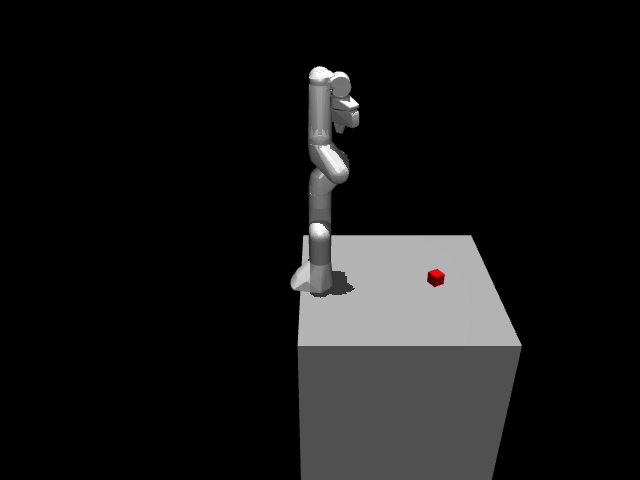

In [426]:
!cd ikfast && python setup.py && cd ..
import mujoco
import mediapy as media
import os
import glfw
import sys
sys.path.append('ikfast')
from ikfast import ikfast_panda_arm as ikfast


def has_valid_renderer():
    """Checks if OpenGL can be initialized successfully."""
    # Try initializing GLFW
    if not glfw.init():
        print("GLFW initialization failed. No valid renderer.")
        return False
    
    # Try creating a hidden window to test OpenGL context creation
    window = glfw.create_window(640, 480, "Renderer Test", None, None)
    if not window:
        print("GLFW could not create an OpenGL context. No valid renderer.")
        glfw.terminate()
        return False
    
    glfw.make_context_current(window)
    renderer_available = True  # If we reach this point, rendering should work

    # Cleanup
    glfw.destroy_window(window)
    glfw.terminate()
    return renderer_available

def render_state(model, data):
    if not has_valid_renderer():
        print("Error rendering the scene. Make sure you have a valid OpenGL installation.")
        return

    mujoco.mj_forward(model, data)
    with mujoco.Renderer(model, height=480, width=640) as renderer:
        renderer.update_scene(data, "front_view")  # Ensure scene is updated with final simulation state
        media.show_image(renderer.render())

def set_joint_positions(model, data, joints):
    data.qpos[7:14] = joints
    data.qpos[14:16] = [0.04, 0.04]
    
# Define the MJCF path and mesh directory
mjcf_path = 'assets/Panda/panda.mjcf'
mesh_dir = 'assets/Panda/meshes/collision/'

# Load mesh files into a dictionary
assets = {}
for file_name in os.listdir(mesh_dir):
    file_path = os.path.join(mesh_dir, file_name)
    with open(file_path, 'rb') as f:
        assets[f'meshes/collision/{file_name}'] = f.read()

# Load the MuJoCo model
model = mujoco.MjModel.from_xml_path(mjcf_path, assets=assets)
data = mujoco.MjData(model)

# Call mj_forward to initialize the state
mujoco.mj_forward(model, data)

# Render the scene
render_state(model, data)

One caveat for using `ikfast` for the Panda is that analytical solutions can only be found for 6-DoF arms, but the Panda is a 7-DoF arm. One common way to deal with this issue is to treat one of the joints as "free", set the value of this joint ourselves, and then run `ikfast` with that fixed joint value. While there are better ways to do this, a simple approach is to sample the value of the free joint uniformly at random from its range. 

Note that, compared to the coordinate frame used last week, the coordinate frame used this week is shifted so that the base of the Panda arm is at the world origin. This doesn't change anything conceptually, but makes it easier to work with `ikfast`. 

##### 3.1)

Write a Python function that implements the following algorithm:
- Given a target pose $X^G$
- for a max number of steps:
    - pick a value of the free joint uniformly at random
    - call `ikfast` to find configurations for the remaining joints 
    - if any solution returned by `ikfast` satisfies all joint limits, return that solution
- if after the max number steps you have found no solutions, return None

`ikfast` has two functions:
- `ikfast.get_ik(R, p, free)`
    - `R` is the rotation matrix $R^G$, expressed as a 3x3 nested Python list (you can use `np_array.tolist()`)
    - `p` is the position vector $p^G$, expressed as a length-3 Python list
    - `free` is a list containing the value of the free joints. For the panda, there is only one free joint, so this is a length-1 list
    - Return: a list of solutions, where each solution is a list of joint positions for joints 1...7. If no solution is found, then returns `None`
- `ikfast.get_fk(joints)` -- this is useful for debugging!
    - `joints` is a list of joint positions for joints 1...7
    - Return: a list of 2 elements. the first element is a 3-element list representing the gripper position, and the second element is a 3x3 nested list representing the gripper rotation matrix


Here are some pointers on how to leverage MuJoCo for this part of the assignment:
- You can get the `id` of a joint by running `mujoco.mj_name2id(model, mujoco.mjtObj.mjOBJ_JOINT, <joint_name>)`
    - The Panda joint names are `panda_joint0` to `panda_joint7`. `joint7` is the free joint in `ikfast`
- You can get the joint limits for a given joint id by getting `model.jnt_range[id, 0]` (for the min) and `model.jnt_range[id, 1]` for the max

_Points:_ 15

In [427]:
def panda_ik_31(R_G, p_G, model, max_iters=100):
    """ Assume that R_G and p_G are the rotation matrix and position vector of the 
    end effector in the world frame, expressed as the list objects expected by ikfast.get_ik
    """
    free_joint_ids = mujoco.mj_name2id(model, mujoco.mjtObj.mjOBJ_JOINT, "panda_joint7")
    free_joint_min = model.jnt_range[free_joint_ids, 0]
    free_joint_max = model.jnt_range[free_joint_ids, 1]
    
    for _ in range(max_iters):
        free_joint = [np.random.uniform(free_joint_min, free_joint_max)]
        ik_solutions = ikfast.get_ik(R_G, p_G, free_joint)
        # Check if the solution is within the joint limits 
        # and return the first valid solution
        if ik_solutions != None:
            for solution in ik_solutions:
                valid = True
                for i in range(7):
                    joint_id = [mujoco.mj_name2id(model, mujoco.mjtObj.mjOBJ_JOINT, f"panda_joint{i+1}")]
                    joint_min = model.jnt_range[joint_id, 0]
                    joint_max = model.jnt_range[joint_id, 1]
                    if solution[i] <= joint_min or solution[i] >= joint_max:
                        valid = False
                        break
                if valid:
                    return solution
                
    return None


### 3.2) 

Now we're ready to pick-and-place with a full Panda arm.

Start by finding the block pose and setting the gripper to a floating configuration, 0.5 units above the block on the $z$ axis of the block, and oriented as: $x$ axis aligned with block's $y$ axis, $y$ axis aligned with block's $x$ axis, and $z$ axis aligned with block's $-z$ axis.

_Points:_ 7

""

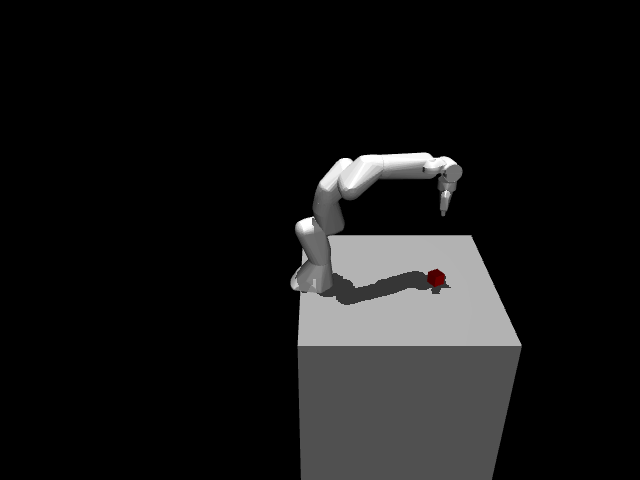

In [428]:
p_B_32 = model.body("block").pos
quat_B_32 = model.body("block").quat
p_BGfloat_32 = np.array([0, 0, 0.5])
Rmat_BGfloat_32 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, -1]]) 
quat_BGfloat_32 = np.empty(4)
mujoco.mju_mat2Quat(quat_BGfloat_32, Rmat_BGfloat_32.reshape(-1)) 

p_Gfloat_32 = np.empty(3)
quat_Gfloat_32 = np.empty(4)
mujoco.mju_mulPose(p_Gfloat_32, quat_Gfloat_32, p_B_32, quat_B_32, p_BGfloat_32, quat_BGfloat_32) 

Rmat_Gfloat_32 = np.empty(9)
mujoco.mju_quat2Mat(Rmat_Gfloat_32, quat_Gfloat_32) 
Rmat_Gfloat_32 = Rmat_Gfloat_32.reshape(3,3)
joints_32 = panda_ik_31(Rmat_Gfloat_32.tolist(), p_Gfloat_32.tolist(), model, max_iters=100)

## Do *not* modify the code below
set_joint_positions(model, data, joints_32)
render_state(model, data)
ans_32 = data.qpos[7:14].tolist()



#### 3.3)
Now let's set the gripper to the "picking" configuration, 0.12 units above the block, with the same orientation

_Points:_ 7

""

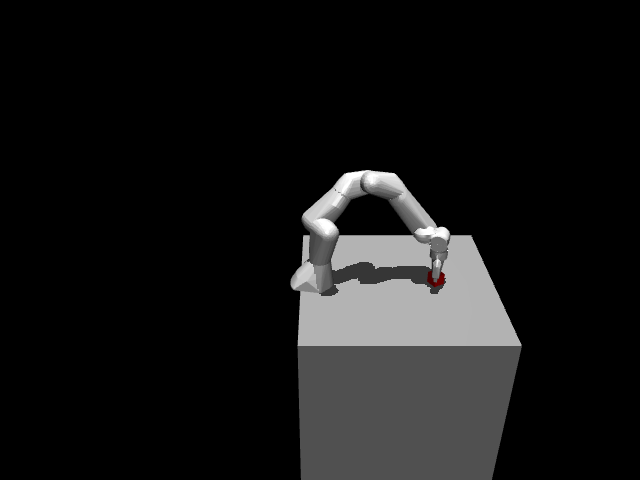

In [429]:
p_GfloatGpick_33 = np.array([0, 0, 0.38])
quat_GfloatGpick_33 = np.array([1., 0., 0., 0.])
p_Gpick_33 = np.empty(3)
quat_Gpick_33 = np.empty(4)
mujoco.mju_mulPose(p_Gpick_33, quat_Gpick_33, p_Gfloat_32, quat_Gfloat_32, p_GfloatGpick_33, quat_GfloatGpick_33) 

Rmat_Gpick33 = np.empty(9)
mujoco.mju_quat2Mat(Rmat_Gpick33, quat_Gpick_33)
Rmat_Gpick33 = Rmat_Gpick33.reshape(3,3)

joints_33 = panda_ik_31(Rmat_Gpick33.tolist(), p_Gpick_33.tolist(), model, max_iters=100)

## Do *not* modify the code below
set_joint_positions(model, data, joints_33)
render_state(model, data)
ans_33 = data.qpos[7:14].tolist()


#### 3.4)

Compute the pose of the block relative to the gripper while the block is held. Then, set the position and orientation of the gripper to match the previous floating configuration.

_Points:_ 7

""

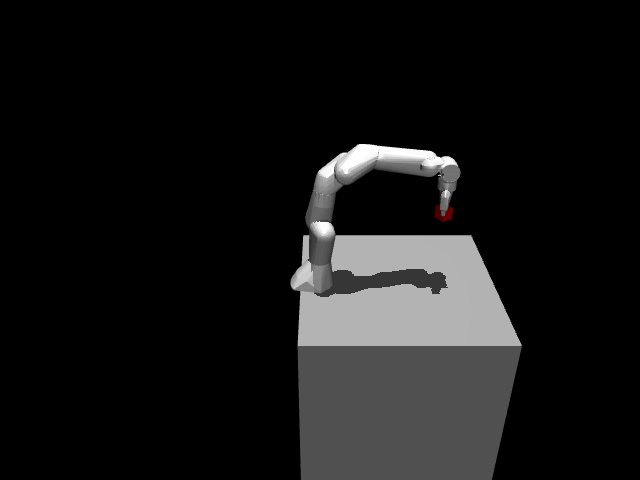

In [430]:
p_BGpick_34 = np.array([0., 0., 0.12]) 
quat_BGpick_34 = quat_BGfloat_32

joints_34 = panda_ik_31(Rmat_Gfloat_32.tolist(), p_Gfloat_32.tolist(), model, max_iters=100)

# The next few lines "attach" the block to the gripper.
# This is not required for obtaining points in the 
# assignment, but is included for visualization purposes.
# This will only "look right" if your answers up to this
# point are correct.
p_GpickB_34 = np.empty(3)
quat_GpickB_34 = np.empty(4)
mujoco.mju_negPose(p_GpickB_34, quat_GpickB_34, p_BGpick_34, quat_BGpick_34)

p_Bfloat = np.empty(3)
quat_Bfloat = np.empty(4)
# Compute the pose of the block int he world frame by 
# composing the pose of the gripper in the world frame
# and the relative pose of the gripper w.r.t. the 
# block 
mujoco.mju_mulPose(p_Bfloat, quat_Bfloat, p_Gfloat_32, quat_Gfloat_32, p_GpickB_34, quat_GpickB_34)
model.body("block").pos = p_Bfloat
model.body("block").quat = quat_Bfloat

## Do *not* modify the code below
set_joint_positions(model, data, joints_34)
render_state(model, data)
ans_34 = data.qpos[7:14].tolist()


#### 3.5)
Now let's move the gripper so that the block hovers above its final desired orientation. We want the block to end up at position $(0.4, -0.4, 0.03)$ aligned with the world frame. In this stage, we want to move the gripper so that the block is $0.5$ units above its target position in the $z$ axis.

_Points:_ 7

""

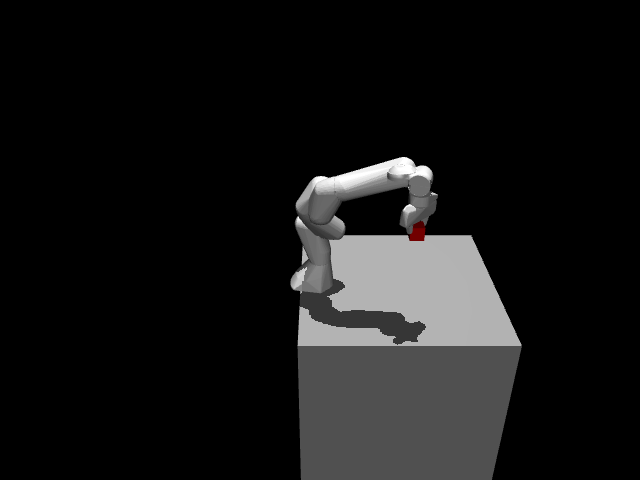

In [431]:
p_Bhover_35 = np.array([0.4, -0.4, 0.53]) 
quat_Bhover_35 = np.array([1., 0., 0., 0.])
p_Ghover_35 = np.empty(3)
quat_Ghover_35 = np.empty(4)
mujoco.mju_mulPose(p_Ghover_35, quat_Ghover_35, p_Bhover_35, quat_Bhover_35, p_BGpick_34, quat_BGpick_34) 

Rmat_Ghover35 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, -1]]) 
joints_35 = panda_ik_31(Rmat_Ghover35.tolist(), p_Ghover_35.tolist(), model, max_iters=100)

# The next few lines "attach" the block to the gripper.
# This is not required for obtaining points in the 
# assignment, but is included for visualization purposes.
# This will only "look right" if your answers up to this
# point are correct.
p_Bhover = np.empty(3)
quat_Bhover = np.empty(4)
# Compute the pose of the block int he world frame by 
# composing the pose of the gripper in the world frame
# and the relative pose of the gripper w.r.t. the 
# block 
mujoco.mju_mulPose(p_Bhover, quat_Bhover, p_Ghover_35, quat_Ghover_35, p_GpickB_34, quat_GpickB_34)
model.body("block").pos = p_Bhover
model.body("block").quat = quat_Bhover

## Do *not* modify the code below
set_joint_positions(model, data, joints_35)
render_state(model, data)
ans_35 = data.qpos[7:14].tolist()


#### 3.6)

Finally, we lower the gripper so that the block is at the target position

_Points:_ 7

""

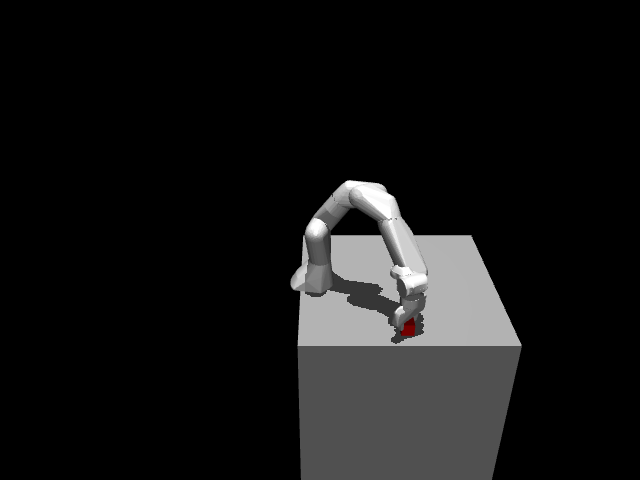

In [432]:
p_GhoverGplace_36 = np.array([0, 0, 0.5])
quat_GhoverGplace_36 = np.array([1., 0., 0., 0.])
p_Gplace_36 = np.empty(3)
quat_Gplace_36 = np.empty(4)
mujoco.mju_mulPose(p_Gplace_36, quat_Gplace_36, p_Ghover_35, quat_Ghover_35, p_GhoverGplace_36, quat_GhoverGplace_36) 

Rmat_Gplace_36 = np.array([[0, 1, 0], [1, 0, 0], [0, 0, -1]]) 
joints_36 = panda_ik_31(Rmat_Gplace_36.tolist(), p_Gplace_36.tolist(), model, max_iters=100)

# The next few lines "attach" the block to the gripper.
# This is not required for obtaining points in the 
# assignment, but is included for visualization purposes.
# This will only "look right" if your answers up to this
# point are correct.
p_Bplace = np.empty(3)
quat_Bplace = np.empty(4)
# Compute the pose of the block int he world frame by 
# composing the pose of the gripper in the world frame
# and the relative pose of the gripper w.r.t. the 
# block 
mujoco.mju_mulPose(p_Bplace, quat_Bplace, p_Gplace_36, quat_Gplace_36, p_GpickB_34, quat_GpickB_34)
model.body("block").pos = p_Bplace
model.body("block").quat = quat_Bplace

## Do *not* modify the code below
set_joint_positions(model, data, joints_36)
render_state(model, data)
ans_36 = data.qpos[7:14].tolist()


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Fill out the answers to all questions and submit your file hw4.ipynb to the HW4 assignment on Gradescope. You are free to resubmit as many times as you wish.

In [433]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:


